# Demand Forecasting In Retail

**Name:** Safa Mariyam

**Organization:** Entri Elevate

**Date:** [Evaluation Date]

## Overview of Problem Statement

Retail businesses face challenges in accurately predicting demand to balance inventory and sales. Overestimating demand leads to overstocking and financial losses, while underestimating results in stockouts and missed opportunities. To ensure smooth operations and customer satisfaction, a robust demand forecasting model is required to optimize inventory management and supply chain efficiency.



## Objective

To develop a machine learning model to predict future demand for retail products. By leveraging historical data, the project aims to identify significant factors influencing demand and accurately predict future demand.

The key goals are:

* **Identify Significant Factors:** Determine the variables that significantly influence demand forecasts in retail.
* **Build Predictive Models:** Develop machine learning models to accurately predict demand based on independent variables.
* **Evaluate Model Performance:** Compare various models to identify the best one for accurate demand forecasting and actionable insights.

## Data Description

**Source Of Data:** The dataset has been sourced from Kaggle, a platform providing public datasets for data analysis and machine learning projects.

**Shape:**
        Rows: 73100
        Columns: 15


**Features:**
* **Date:** Date of observation.
* **Store ID:** Unique identifier for each store.
* **Product ID:** Unique identifier for products.
* **Category:** Product category (e.g., Groceries, Electronics).
* **Region**: Geographical region where the store is located.
* **Inventory Level**: Current stock levels.
* **Units Sold:** Actual units sold.
* **Units Ordered:** Quantity of products ordered.
* **Price:** Selling price of the product.
* **Discount:** Discount percentage applied.
* **Weather Condition:** External condition (e.g., Rainy, Sunny).
* **Holiday/Promotion:** Binary indicator for holidays or promotions.
* **Competitor Pricing:** Competitor product price.
* **Seasonality:** Seasonal trends (e.g., Summer, Autumn).

## Data Collection

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from scipy.stats import uniform
from sklearn.pipeline import Pipeline

In [9]:
data = pd.read_csv("Retail_Store_Inventory.csv")

In [10]:
df= pd.DataFrame(data)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 8.4+

In [12]:
df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,01-01-2022,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,01-01-2022,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,01-01-2022,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,01-01-2022,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,01-01-2022,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


In [13]:
df.tail()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
73095,01-01-2024,S005,P0016,Furniture,East,96,8,127,18.46,73.73,20,Snowy,0,72.45,Winter
73096,01-01-2024,S005,P0017,Toys,North,313,51,101,48.43,82.57,10,Cloudy,0,83.78,Autumn
73097,01-01-2024,S005,P0018,Clothing,West,278,36,151,39.65,11.11,10,Rainy,0,10.91,Winter
73098,01-01-2024,S005,P0019,Toys,East,374,264,21,270.52,53.14,20,Rainy,0,55.80,Spring
73099,01-01-2024,S005,P0020,Groceries,East,117,6,165,2.33,78.39,20,Rainy,1,79.52,Spring


In [14]:
df.shape

(73100, 15)

In [15]:
df.describe()

,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Competitor Pricing
count,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000
mean,274.469877,136.464870,110.004473,141.494720,55.135108,10.009508,0.497305,55.146077
std,129.949514,108.919406,52.277448,109.254076,26.021945,7.083746,0.499996,26.191408
min,50.000000,0.000000,20.000000,-9.990000,10.000000,0.000000,0.000000,5.030000
25%,162.000000,49.000000,65.000000,53.670000,32.650000,5.000000,0.000000,32.680000
50%,273.000000,107.000000,110.000000,113.015000,55.050000,10.000000,0.000000,55.010000
75%,387.000000,203.000000,155.000000,208.052500,77.860000,15.000000,1.000000,77.820000
max,500.000000,499.000000,200.000000,518.550000,100.000000,20.000000,1.000000,104.940000


In [16]:
df.describe(include='object').T

,count,unique,top,freq
Date,73100,731,01-01-2022,100
Store ID,73100,5,S001,14620
Product ID,73100,20,P0001,3655
Category,73100,5,Furniture,14699
Region,73100,4,East,18349
Weather Condition,73100,4,Sunny,18290
Seasonality,73100,4,Spring,18317


**Renaming some columns**

In [17]:
df = df.rename(columns={'Inventory Level': 'Inventory', 
                        'Units Sold': 'Sales', 
                        'Units Ordered': 'Orders', 
                        'Demand Forecast': 'Demand', 
                        'Weather Condition': 'Weather', 
                        'Holiday/Promotion': 'Promotion', })

In [18]:
df.columns

Index(['Date', 'Store ID', 'Product ID', 'Category', 'Region', 'Inventory',
       'Sales', 'Orders', 'Demand', 'Price', 'Discount', 'Weather',
       'Promotion', 'Competitor Pricing', 'Seasonality'],
      dtype='object')

## Data Preprocessing

**Dropping date and Id columns**

In [19]:
df.drop(columns = ['Date', 'Product ID', 'Store ID'],inplace=True)

In [20]:
num_cols = df.select_dtypes(include='number').columns
print("Total Numerical Features:",num_cols.shape)
print("Numeric Features:",num_cols)

Total Numerical Features: (8,)
Numeric Features: Index(['Inventory', 'Sales', 'Orders', 'Demand', 'Price', 'Discount',
       'Promotion', 'Competitor Pricing'],
      dtype='object')


In [21]:
cat_cols = df.select_dtypes(include='object').columns
print("Total Categorical Features:",cat_cols.shape)
print("Categorical Features:",cat_cols)

Total Categorical Features: (4,)
Categorical Features: Index(['Category', 'Region', 'Weather', 'Seasonality'], dtype='object')


In [22]:
df.columns

Index(['Category', 'Region', 'Inventory', 'Sales', 'Orders', 'Demand', 'Price',
       'Discount', 'Weather', 'Promotion', 'Competitor Pricing',
       'Seasonality'],
      dtype='object')

**Checking for duplicates**

In [23]:
df.duplicated().sum()

0

No duplicated values found.

**Checking for null values**

In [24]:
df.isnull().sum()

Category              0
Region                0
Inventory             0
Sales                 0
Orders                0
Demand                0
Price                 0
Discount              0
Weather               0
Promotion             0
Competitor Pricing    0
Seasonality           0
dtype: int64

Null values was not found.

**Checking for outliers**

In [25]:
# Calculate Q1, Q3, and IQR
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ((df[num_cols] < lower_bound) | (df[num_cols] > upper_bound))
print("Number of outliers in each column:")
print(outliers.sum())

Number of outliers in each column:
Inventory               0
Sales                 715
Orders                  0
Demand                732
Price                   0
Discount                0
Promotion               0
Competitor Pricing      0
dtype: int64


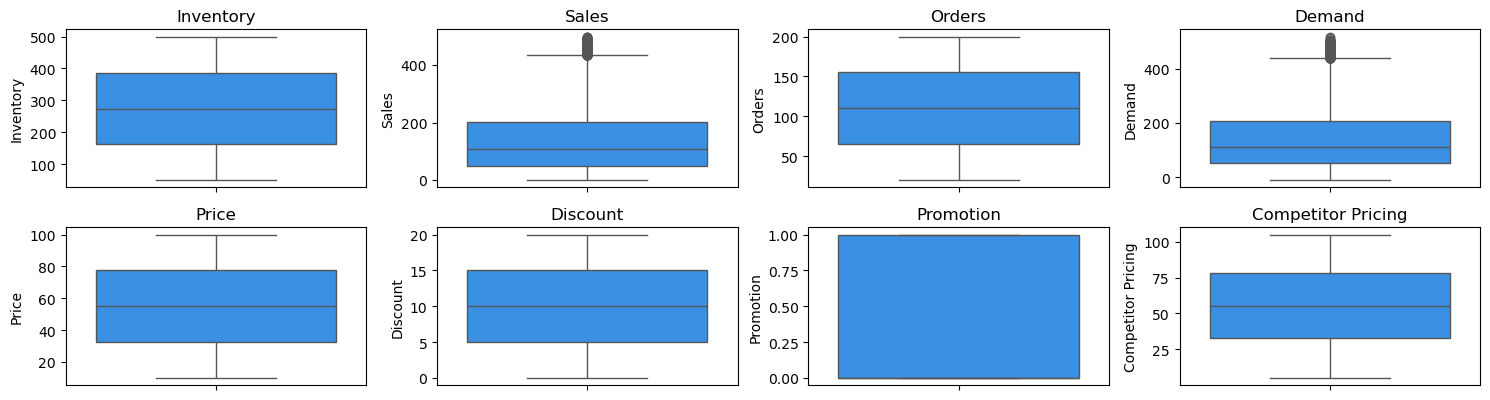

In [26]:
plt.figure(figsize=(15,10))
for i,col in enumerate(num_cols):
    plt.subplot(5,4,i+1)
    sns.boxplot(y=df[col], color='dodgerblue')
    plt.title(col)
plt.tight_layout()
plt.show()

In [27]:
df1 = df.copy()

**Handling Outliers**

In [28]:
# Cap outliers to the threshold values (IQR method)
df1[num_cols] = df1[num_cols].clip(lower=lower_bound, upper=upper_bound, axis=1)

print("Shape after capping outliers:", df1[num_cols].shape)


Shape after capping outliers: (73100, 8)


**BoxPlot after handling outliers**

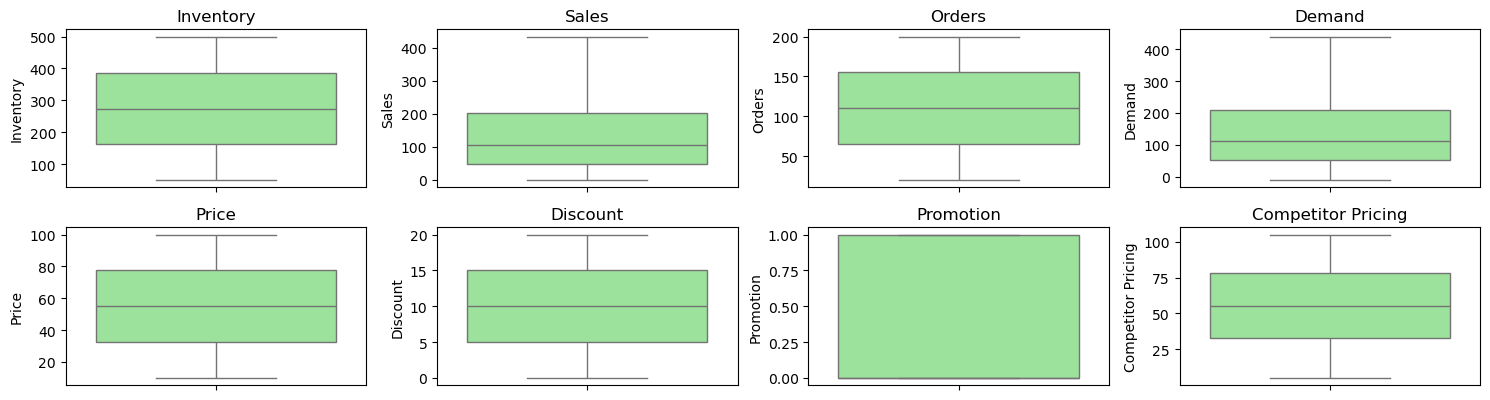

In [29]:
plt.figure(figsize=(15,10))
for i,col in enumerate(num_cols):
    plt.subplot(5,4,i+1)
    sns.boxplot(y=df1[col], color='lightgreen')
    plt.title(col)
plt.tight_layout()
plt.show()

**Addressing Skewness**

In [30]:
skewness = df[num_cols].skew()

# Categorize skewness
no_skewness = skewness[(skewness >= -0.5) & (skewness <= 0.5)]
moderate_skewness = skewness[(skewness > 0.5) & (skewness <= 1) | (skewness < -0.5) & (skewness >= -1)]
high_skewness = skewness[(skewness > 1) | (skewness < -1)]

# Display results
print("Skewness of Numeric Columns:\n", skewness)
print("\nNo Skewness:\n", no_skewness)
print("\nModerate Skewness:\n", moderate_skewness)
print("\nHigh Skewness:\n", high_skewness)

Skewness of Numeric Columns:
 Inventory             0.010116
Sales                 0.905333
Orders                0.003787
Demand                0.894852
Price                -0.002732
Discount             -0.001828
Promotion             0.010780
Competitor Pricing   -0.002166
dtype: float64

No Skewness:
 Inventory             0.010116
Orders                0.003787
Price                -0.002732
Discount             -0.001828
Promotion             0.010780
Competitor Pricing   -0.002166
dtype: float64

Moderate Skewness:
 Sales     0.905333
Demand    0.894852
dtype: float64

High Skewness:
 Series([], dtype: float64)


In [31]:
df

,Category,Region,Inventory,Sales,Orders,Demand,Price,Discount,Weather,Promotion,Competitor Pricing,Seasonality
0,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...
73095,Furniture,East,96,8,127,18.46,73.73,20,Snowy,0,72.45,Winter
73096,Toys,North,313,51,101,48.43,82.57,10,Cloudy,0,83.78,Autumn
73097,Clothing,West,278,36,151,39.65,11.11,10,Rainy,0,10.91,Winter
73098,Toys,East,374,264,21,270.52,53.14,20,Rainy,0,55.80,Spring


## Exploratory Data Analysis

**Analysing numerical columns**

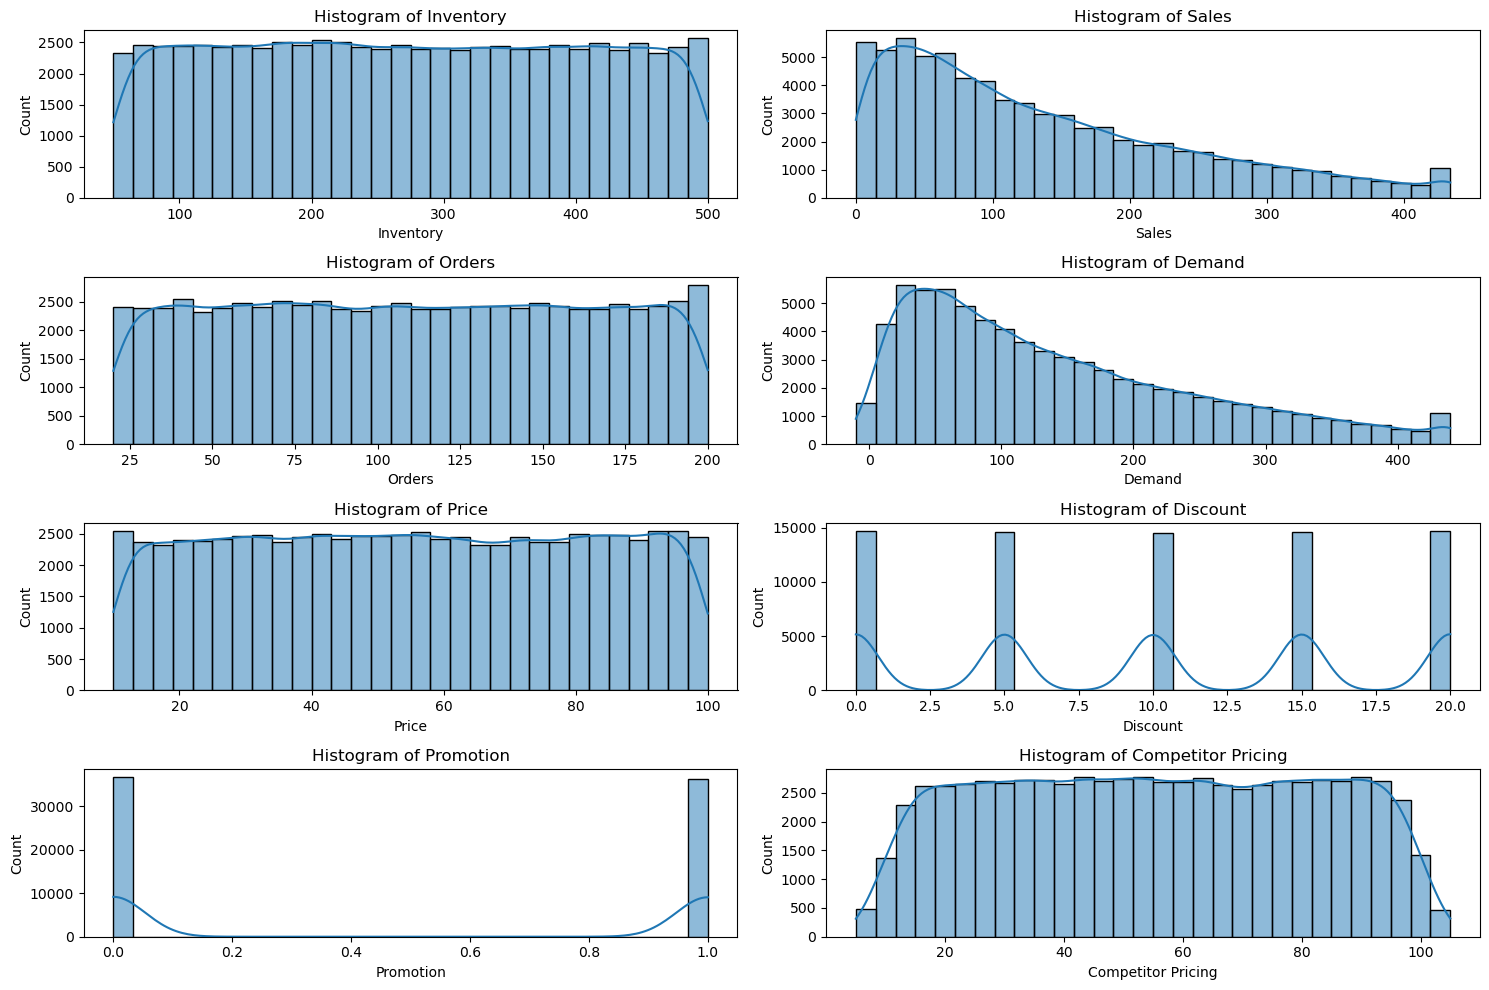

In [32]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 2, i)  # Adjust rows/columns based on the number of features
    sns.histplot(df1[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()     

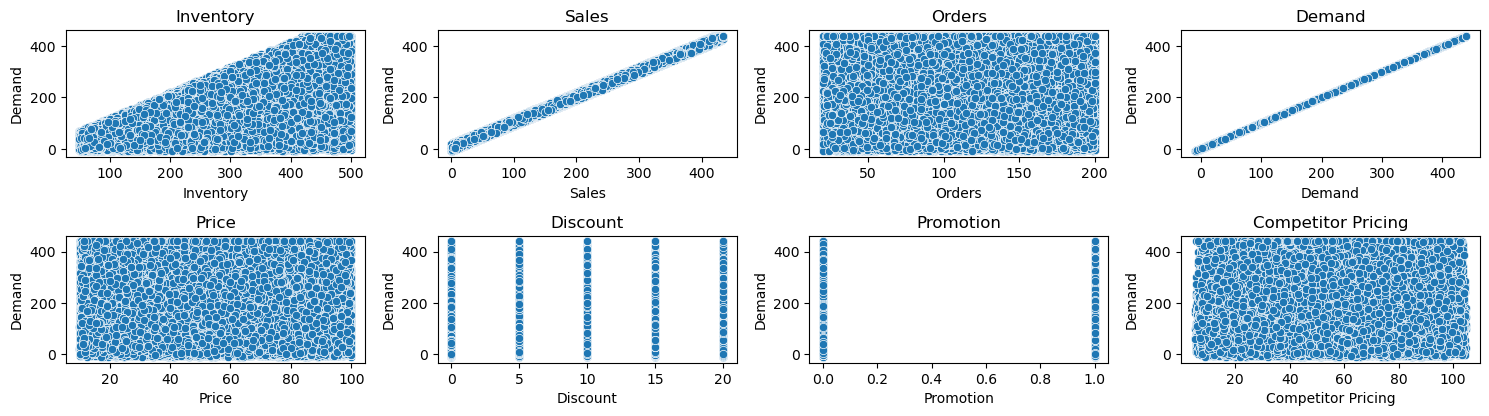

In [33]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(5, 4, i+1)
    sns.scatterplot(data=df1,x=col,y='Demand')
    plt.title(col)
    plt.xlabel(col)
plt.tight_layout()
plt.savefig("Scatter.png")
plt.show()

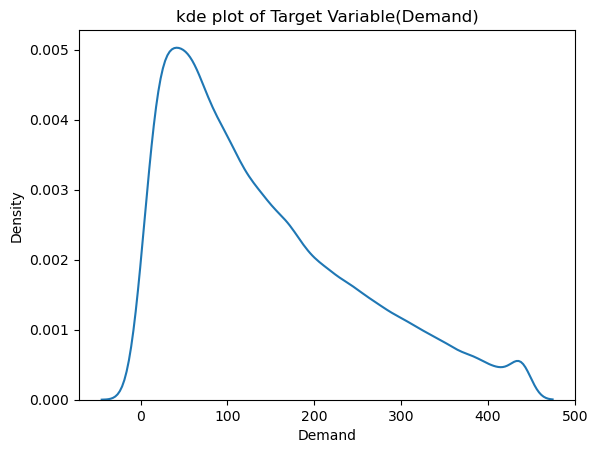

In [34]:
sns.kdeplot(df1.Demand)
plt.title("kde plot of Target Variable(Demand)")
plt.show()

In [35]:
corr1 = df1[num_cols].corr()

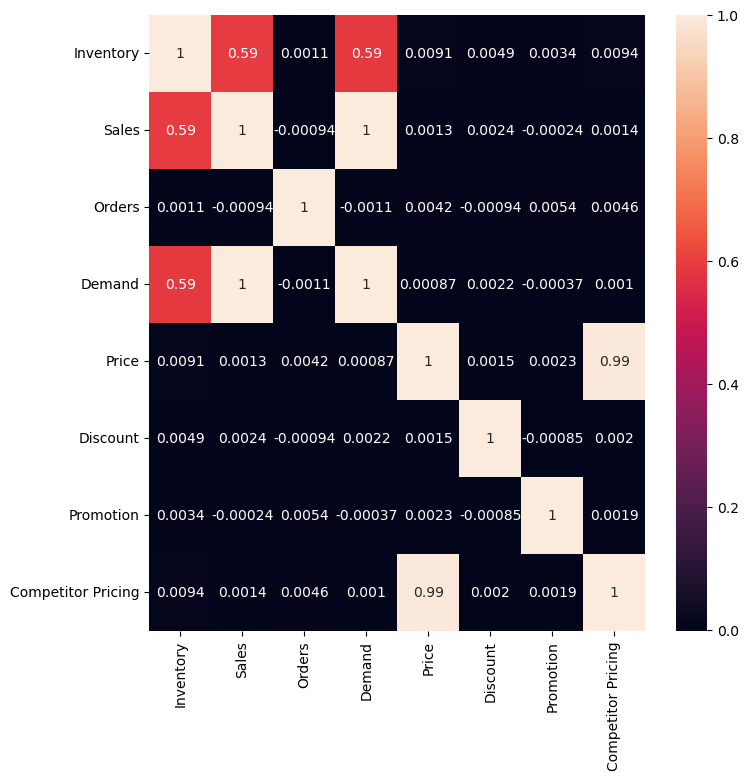

In [36]:
plt.figure(figsize=(8,8))
sns.heatmap(corr1, annot=True)
plt.savefig("corre.png")
plt.show()

**Analysing Categorical Columns**

In [37]:
# Checking the number of unique values in each categorical column
unique_counts = df1[cat_cols].nunique()
unique_counts

Category       5
Region         4
Weather        4
Seasonality    4
dtype: int64

Distribution of Category:
Category
Furniture      14699
Toys           14643
Clothing       14626
Groceries      14611
Electronics    14521
Name: count, dtype: int64


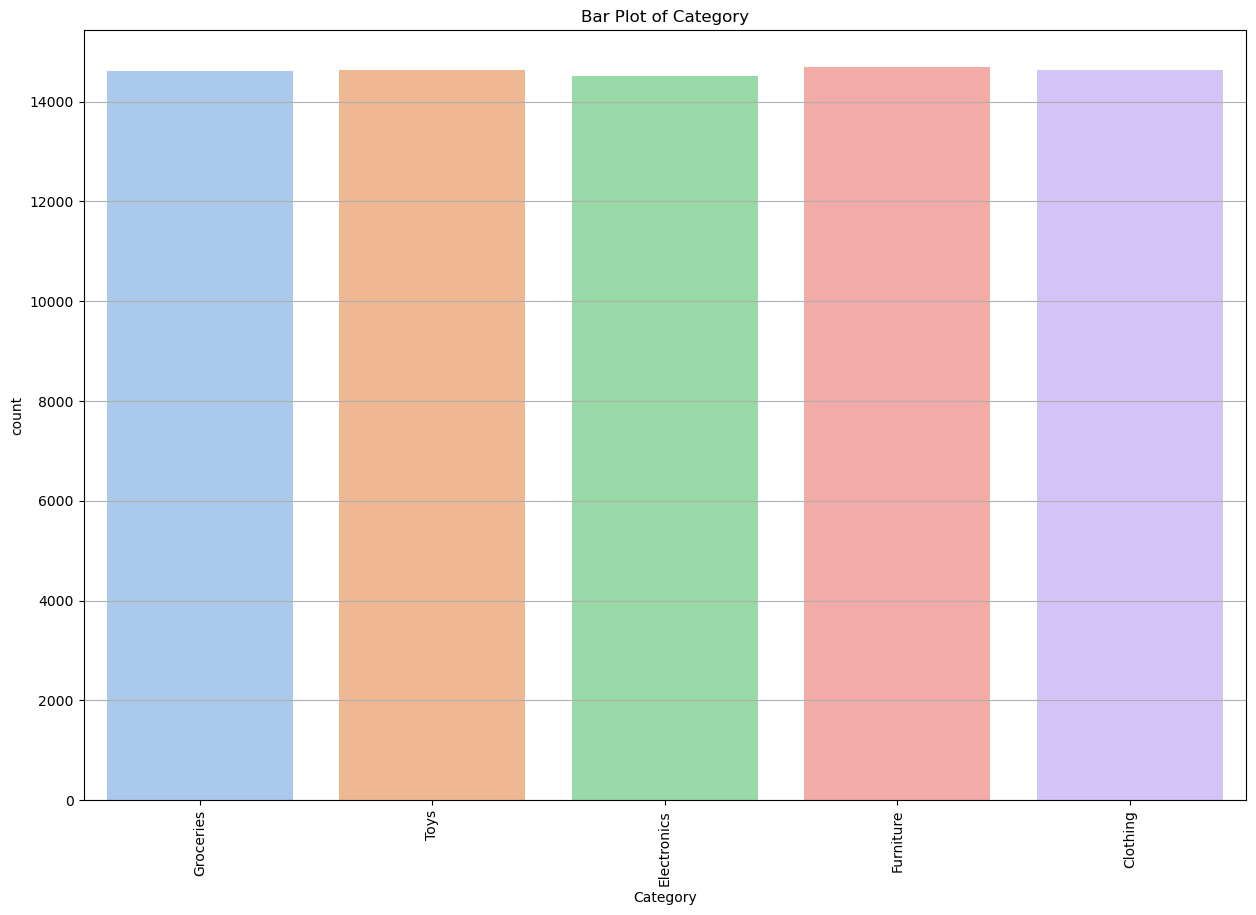

Distribution of Region:
Region
East     18349
South    18297
North    18228
West     18226
Name: count, dtype: int64


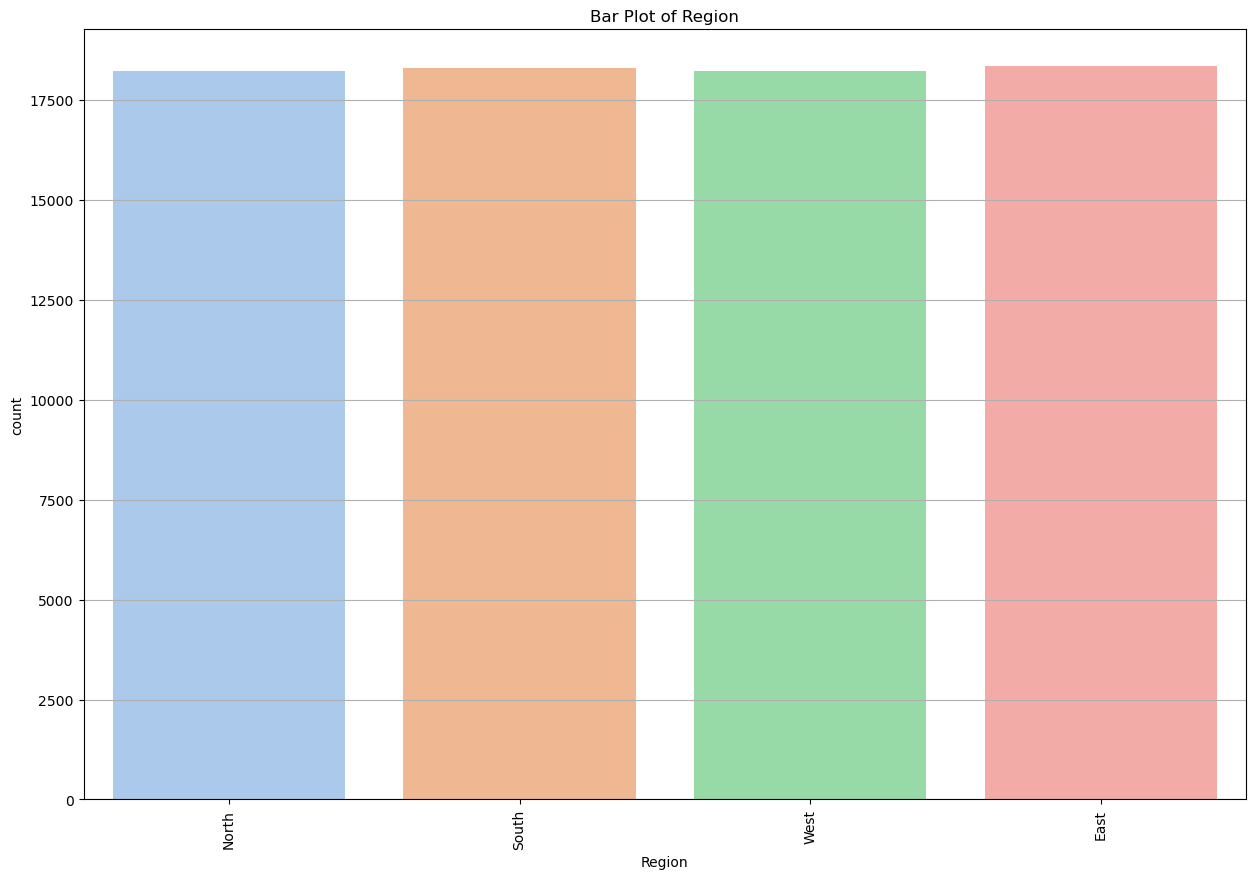

Distribution of Weather:
Weather
Sunny     18290
Rainy     18278
Snowy     18272
Cloudy    18260
Name: count, dtype: int64


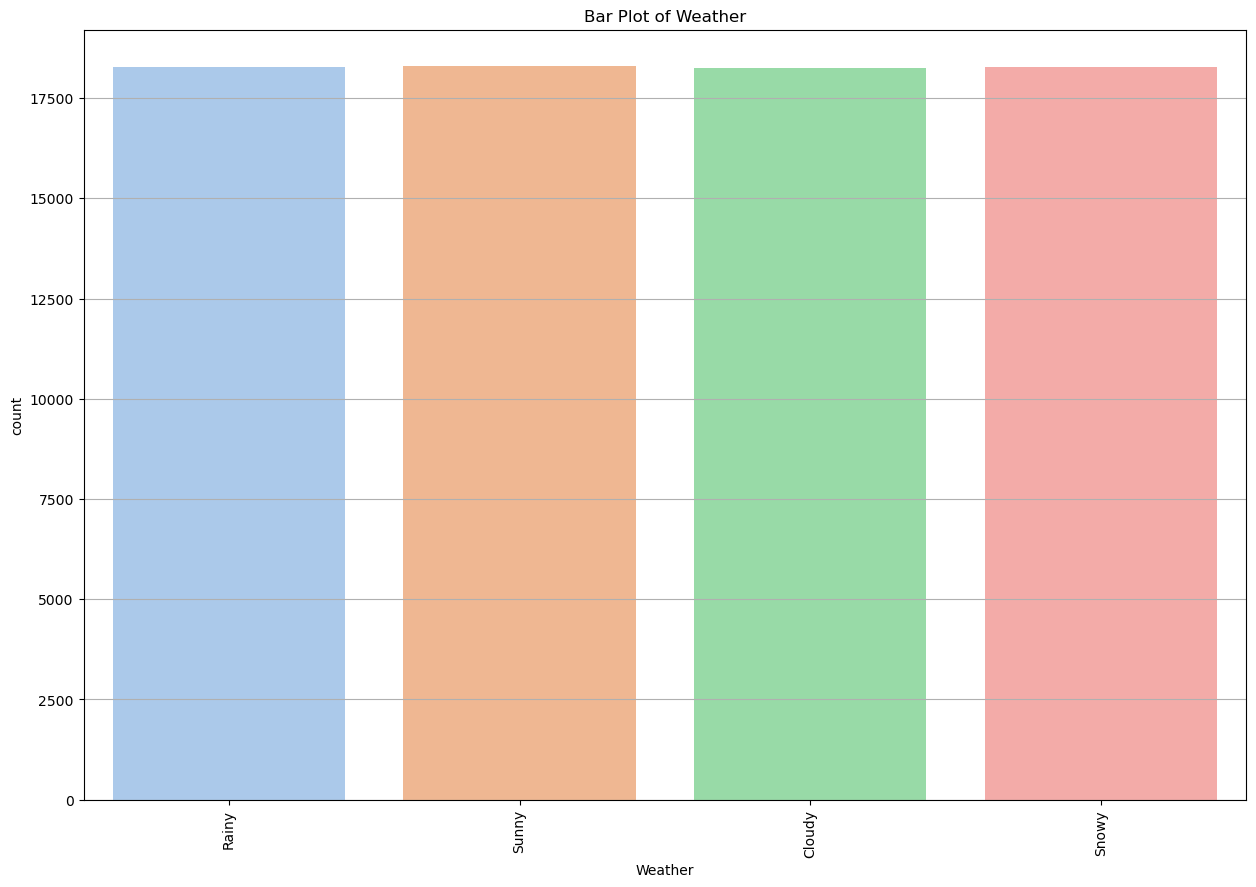

Distribution of Seasonality:
Seasonality
Spring    18317
Summer    18305
Winter    18285
Autumn    18193
Name: count, dtype: int64


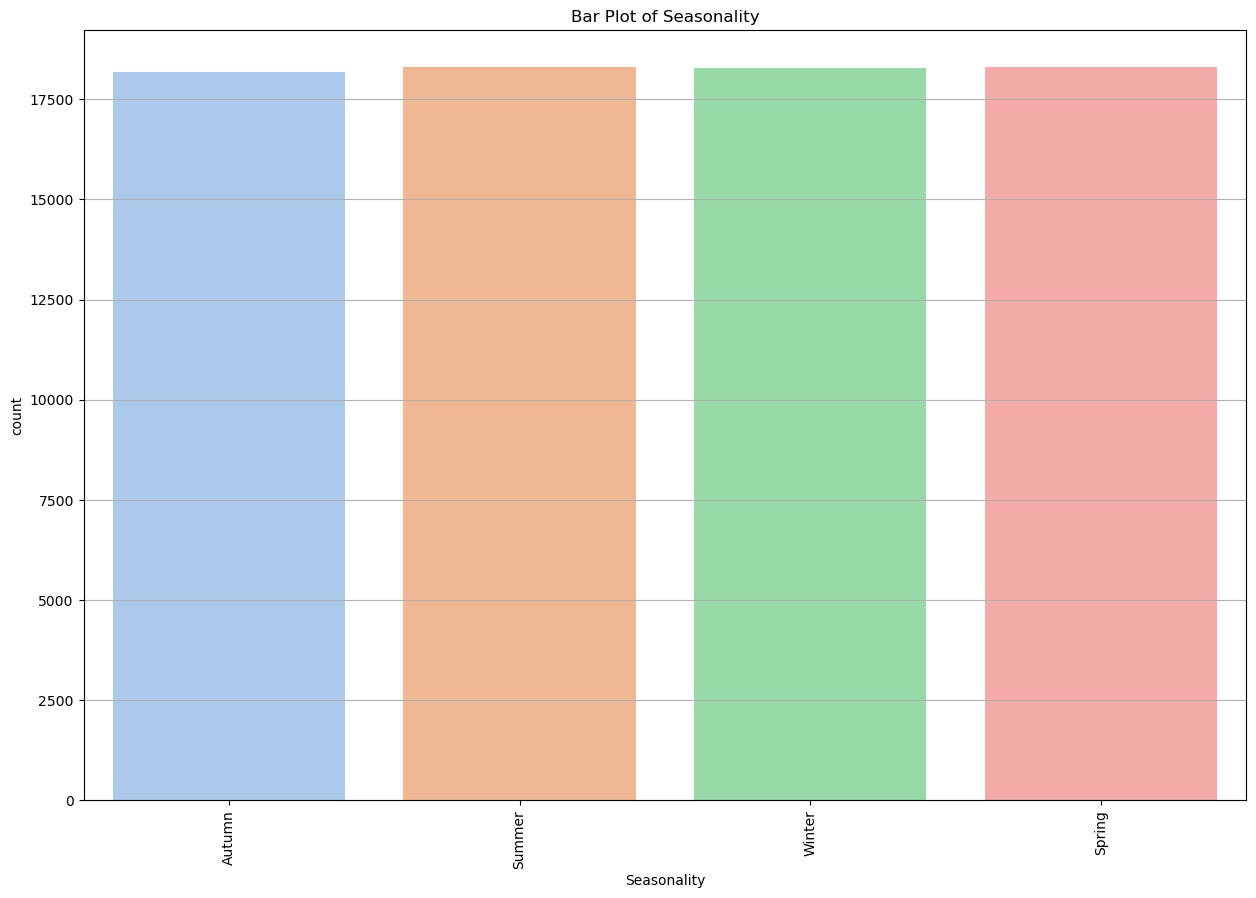

In [38]:
# Distribution of column and unique values
for col in cat_cols:
    print(f"Distribution of {col}:")
    print(df1[col].value_counts())

    # Bar plot visualization
    plt.figure(figsize=(15, 10))
    sns.countplot(x=col, data=df1,palette='pastel')
    plt.title(f'Bar Plot of {col}')
    plt.xticks(rotation=90)

     # Grid lines only for y-axis
    plt.grid(axis='y')
    
    plt.show()

## Feature Engineering: Encoding Categorical Variables

In [39]:
# One-Hot Encoding
df1 = pd.get_dummies(df1, columns=['Category', 'Region', 'Weather', 'Seasonality'])

In [40]:
df1

,Inventory,Sales,Orders,Demand,Price,Discount,Promotion,Competitor Pricing,Category_Clothing,Category_Electronics,...,Region_South,Region_West,Weather_Cloudy,Weather_Rainy,Weather_Snowy,Weather_Sunny,Seasonality_Autumn,Seasonality_Spring,Seasonality_Summer,Seasonality_Winter
0,231,127,55,135.47,33.50,20,0,29.69,False,False,...,False,False,False,True,False,False,True,False,False,False
1,204,150,66,144.04,63.01,20,0,66.16,False,False,...,True,False,False,False,False,True,True,False,False,False
2,102,65,51,74.02,27.99,10,1,31.32,False,False,...,False,True,False,False,False,True,False,False,True,False
3,469,61,164,62.18,32.72,10,1,34.74,False,False,...,False,False,True,False,False,False,True,False,False,False
4,166,14,135,9.26,73.64,0,0,68.95,False,True,...,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73095,96,8,127,18.46,73.73,20,0,72.45,False,False,...,False,False,False,False,True,False,False,False,False,True
73096,313,51,101,48.43,82.57,10,0,83.78,False,False,...,False,False,True,False,False,False,True,False,False,False
73097,278,36,151,39.65,11.11,10,0,10.91,True,False,...,False,True,False,True,False,False,False,False,False,True
73098,374,264,21,270.52,53.14,20,0,55.80,False,False,...,False,False,False,True,False,False,False,True,False,False


In [41]:
boolean_cols = df1.select_dtypes(include='bool').columns

df1[boolean_cols] = df1[boolean_cols].astype(int)

#df1 = df1.astype(int)

In [42]:
df1

,Inventory,Sales,Orders,Demand,Price,Discount,Promotion,Competitor Pricing,Category_Clothing,Category_Electronics,...,Region_South,Region_West,Weather_Cloudy,Weather_Rainy,Weather_Snowy,Weather_Sunny,Seasonality_Autumn,Seasonality_Spring,Seasonality_Summer,Seasonality_Winter
0,231,127,55,135.47,33.50,20,0,29.69,0,0,...,0,0,0,1,0,0,1,0,0,0
1,204,150,66,144.04,63.01,20,0,66.16,0,0,...,1,0,0,0,0,1,1,0,0,0
2,102,65,51,74.02,27.99,10,1,31.32,0,0,...,0,1,0,0,0,1,0,0,1,0
3,469,61,164,62.18,32.72,10,1,34.74,0,0,...,0,0,1,0,0,0,1,0,0,0
4,166,14,135,9.26,73.64,0,0,68.95,0,1,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73095,96,8,127,18.46,73.73,20,0,72.45,0,0,...,0,0,0,0,1,0,0,0,0,1
73096,313,51,101,48.43,82.57,10,0,83.78,0,0,...,0,0,1,0,0,0,1,0,0,0
73097,278,36,151,39.65,11.11,10,0,10.91,1,0,...,0,1,0,1,0,0,0,0,0,1
73098,374,264,21,270.52,53.14,20,0,55.80,0,0,...,0,0,0,1,0,0,0,1,0,0


### Splitting the dataset and setting the target variable

In [43]:
y = df1.Demand

In [44]:
x= df1.drop('Demand', axis=1)

In [45]:
x

,Inventory,Sales,Orders,Price,Discount,Promotion,Competitor Pricing,Category_Clothing,Category_Electronics,Category_Furniture,...,Region_South,Region_West,Weather_Cloudy,Weather_Rainy,Weather_Snowy,Weather_Sunny,Seasonality_Autumn,Seasonality_Spring,Seasonality_Summer,Seasonality_Winter
0,231,127,55,33.50,20,0,29.69,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,204,150,66,63.01,20,0,66.16,0,0,0,...,1,0,0,0,0,1,1,0,0,0
2,102,65,51,27.99,10,1,31.32,0,0,0,...,0,1,0,0,0,1,0,0,1,0
3,469,61,164,32.72,10,1,34.74,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,166,14,135,73.64,0,0,68.95,0,1,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73095,96,8,127,73.73,20,0,72.45,0,0,1,...,0,0,0,0,1,0,0,0,0,1
73096,313,51,101,82.57,10,0,83.78,0,0,0,...,0,0,1,0,0,0,1,0,0,0
73097,278,36,151,11.11,10,0,10.91,1,0,0,...,0,1,0,1,0,0,0,0,0,1
73098,374,264,21,53.14,20,0,55.80,0,0,0,...,0,0,0,1,0,0,0,1,0,0


**SelectKBest Filter**

In [46]:
from sklearn.feature_selection import SelectKBest, f_regression

# 1. Initialize SelectKBest with a scoring function and number of features to select
k_best = SelectKBest(score_func=f_regression, k=24)

# 2. Fit and transform the feature set (X) with respect to the target variable (y)
X_k_best = k_best.fit_transform(x, y)

# 3. Get the scores for each feature
feature_scores = k_best.scores_

# 4. Retrieve the names of the selected features
selected_features = x.columns[k_best.get_support()].tolist()

#selected_features = x.columns

# Output the results
print("SelectKBest Results:")
print(f"Features selected: {len(selected_features)}")
print("Selected features:", selected_features)
print("\nFeature Scores:")
#print(pd.DataFrame({'Feature': x.columns, 'Score': feature_scores}).sort_values(by='Score', ascending=False).head(12))

scores = pd.DataFrame({'Feature': x.columns, 'Score': feature_scores})

scores_sorted = scores.sort_values(by='Score', ascending=False).head(12)

print(scores_sorted)

# 4. Convert X_k_best to a DataFrame for scaling
X_k_best_df = pd.DataFrame(X_k_best, columns=selected_features)


SelectKBest Results:
Features selected: 24
Selected features: ['Inventory', 'Sales', 'Orders', 'Price', 'Discount', 'Promotion', 'Competitor Pricing', 'Category_Clothing', 'Category_Electronics', 'Category_Furniture', 'Category_Groceries', 'Category_Toys', 'Region_East', 'Region_North', 'Region_South', 'Region_West', 'Weather_Cloudy', 'Weather_Rainy', 'Weather_Snowy', 'Weather_Sunny', 'Seasonality_Autumn', 'Seasonality_Spring', 'Seasonality_Summer', 'Seasonality_Winter']

Feature Scores:
                 Feature         Score
1                  Sales  1.153630e+07
0              Inventory  3.878225e+04
19         Weather_Sunny  5.119721e+00
20    Seasonality_Autumn  3.541446e+00
8   Category_Electronics  3.441186e+00
17         Weather_Rainy  3.257901e+00
9     Category_Furniture  2.616939e+00
22    Seasonality_Summer  2.247903e+00
15           Region_West  1.247604e+00
21    Seasonality_Spring  1.005882e+00
14          Region_South  9.716748e-01
18         Weather_Snowy  6.540577e-01


In [47]:
X_k_best_df.head()

,Inventory,Sales,Orders,Price,Discount,Promotion,Competitor Pricing,Category_Clothing,Category_Electronics,Category_Furniture,...,Region_South,Region_West,Weather_Cloudy,Weather_Rainy,Weather_Snowy,Weather_Sunny,Seasonality_Autumn,Seasonality_Spring,Seasonality_Summer,Seasonality_Winter
0,231.0,127.0,55.0,33.50,20.0,0.0,29.69,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,204.0,150.0,66.0,63.01,20.0,0.0,66.16,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,102.0,65.0,51.0,27.99,10.0,1.0,31.32,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,469.0,61.0,164.0,32.72,10.0,1.0,34.74,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,166.0,14.0,135.0,73.64,0.0,0.0,68.95,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## Feature Scaling

In [48]:
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Apply different scaling methods
X_standardized = standard_scaler.fit_transform(X_k_best_df)
X_normalized = minmax_scaler.fit_transform(X_k_best_df)

In [49]:
# Convert to DataFrames for better visualization
X_standardized = pd.DataFrame(X_standardized, columns=selected_features)
X_normalized = pd.DataFrame(X_normalized, columns=selected_features)

In [50]:
X_standardized

,Inventory,Sales,Orders,Price,Discount,Promotion,Competitor Pricing,Category_Clothing,Category_Electronics,Category_Furniture,...,Region_South,Region_West,Weather_Cloudy,Weather_Rainy,Weather_Snowy,Weather_Sunny,Seasonality_Autumn,Seasonality_Spring,Seasonality_Summer,Seasonality_Winter
0,-0.334516,-0.085357,-1.052172,-0.831423,1.410350,-0.994625,-0.971931,-0.500128,-0.497883,-0.501688,...,-0.577814,-0.576318,-0.577034,1.731861,-0.577287,-0.577666,1.737248,-0.578235,-0.577982,-0.577561
1,-0.542290,0.127067,-0.841754,0.302627,1.410350,-0.994625,0.420520,-0.500128,-0.497883,-0.501688,...,1.730662,-0.576318,-0.577034,-0.577413,-0.577287,1.731104,1.737248,-0.578235,-0.577982,-0.577561
2,-1.327216,-0.657979,-1.128687,-1.043169,-0.001342,1.005404,-0.909697,-0.500128,-0.497883,-0.501688,...,-0.577814,1.735152,-0.577034,-0.577413,-0.577287,1.731104,-0.575623,-0.578235,1.730157,-0.577561
3,1.496977,-0.694923,1.032872,-0.861398,-0.001342,1.005404,-0.779119,-0.500128,-0.497883,-0.501688,...,-0.577814,-0.576318,1.732999,-0.577413,-0.577287,-0.577666,1.737248,-0.578235,-0.577982,-0.577561
4,-0.834714,-1.129007,0.478135,0.711131,-1.413034,-0.994625,0.527044,-0.500128,2.008504,-0.501688,...,-0.577814,-0.576318,-0.577034,-0.577413,-0.577287,1.731104,-0.575623,-0.578235,1.730157,-0.577561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73095,-1.373388,-1.184422,0.325105,0.714590,1.410350,-0.994625,0.660676,-0.500128,-0.497883,1.993271,...,-0.577814,-0.576318,-0.577034,-0.577413,1.732240,-0.577666,-0.575623,-0.578235,-0.577982,1.731419
73096,0.296503,-0.787281,-0.172245,1.054306,-0.001342,-0.994625,1.093264,-0.500128,-0.497883,-0.501688,...,-0.577814,-0.576318,1.732999,-0.577413,-0.577287,-0.577666,1.737248,-0.578235,-0.577982,-0.577561
73097,0.027166,-0.925819,0.784197,-1.691857,-0.001342,-0.994625,-1.688965,1.999487,-0.497883,-0.501688,...,-0.577814,1.735152,-0.577034,1.731861,-0.577287,-0.577666,-0.575623,-0.578235,-0.577982,1.731419
73098,0.765919,1.179952,-1.702552,-0.076671,1.410350,-0.994625,0.024967,-0.500128,-0.497883,-0.501688,...,-0.577814,-0.576318,-0.577034,1.731861,-0.577287,-0.577666,-0.575623,1.729401,-0.577982,-0.577561


## Split Data into Training and Testing Sets

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size = 0.2, random_state=42)

In [52]:
# Output the shapes of the new training and testing sets 
print("Training set shape (features):", X_train.shape) 
print("Test set shape (features):", X_test.shape) 
print("Training set shape (target):", y_train.shape) 
print("Test set shape (target):", y_test.shape)

Training set shape (features): (58480, 24)
Test set shape (features): (14620, 24)
Training set shape (target): (58480,)
Test set shape (target): (14620,)
